In [1]:
%pprint

Pretty printing has been turned OFF


## 2016 Election Project
### Part 3 of Processing Pipeline

This notebook is intended to document analysis of my data throughout this project. The data I am starting out with are transcripts of the presidential debates from the 2016 US Election- the 10 Democratic primary debates, the 12 Republican primary debates, and the debates for the general election between Hillary Clinton and Donald Trump. The transcripts were taken from UCSB's American Presidency Project. The citations for these transcripts can be found in the README. Using these transcripts I'll analyze the referring expressions the candidates use for each other, try classifying utterance by each candidate, and perhaps a classifer to sort different types of referring expressions (i.e. female, male, professional).

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle

In [3]:
f = open('/Users/Paige/Documents/Data_Science/link_dict.pkl', 'rb')
link_dict = pickle.load(f)
f.close()

In [4]:
f = open('/Users/Paige/Documents/Data_Science/master_df.pkl', 'rb')
master_df = pickle.load(f)
f.close
master_df = master_df.reset_index(drop=True)
master_df.head()

,Date,Debate Type,Speaker,Sents,Tree
0,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,"[(It, PRP), (is, VBZ), (9:00, CD), (p.m., NN),..."
1,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,"[(Welcome, VB), (to, TO), (the, DT), (sixth, J..."
2,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...","[(I, PRP), ('m, VBP), [(Neil, JJ), (Cavuto, NN..."
3,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,"[(Tonight, NN), (we, PRP), (are, VBP), (workin..."
4,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...","[(And, CC), (according, VBG), (to, TO), [(Face..."


**First, I'm going to create a mapping function that will make it easier to see if a person is being talked about in a particular utterance. This function is just going to create a set of all of the entity labels that appear in the tree. Then, to see if a person is being referred to in a particular utterance, we can just see if they are in that set instead of traversing the tree each time.**

In [5]:
def entity_tracking(tree):
    name = ''
    referred_to = []
    entities = set(link_dict.values())
    for chunk in tree:
        if hasattr(chunk, 'label'):
            if chunk.label() in entities:
                referred_to.append(chunk.label())
                    
    return list(set(referred_to))

In [6]:
master_df['Entities'] = master_df.Tree.map(entity_tracking)
master_df.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
0,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,"[(It, PRP), (is, VBZ), (9:00, CD), (p.m., NN),...",[]
1,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,"[(Welcome, VB), (to, TO), (the, DT), (sixth, J...",[]
2,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...","[(I, PRP), ('m, VBP), [(Neil, JJ), (Cavuto, NN...","[Maria Bartiromo, Neil Cavuto]"
3,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,"[(Tonight, NN), (we, PRP), (are, VBP), (workin...",[]
4,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...","[(And, CC), (according, VBG), (to, TO), [(Face...",[]


**Let's see how many times each relevant entity was referred to throughout all of the debates:**

In [7]:
ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label') and chunk.label() not in ['GPE', 'ORGANIZATION', 'PERSON', 'LOCATION', 'GSP', 'FACILITY' ]:
            ner_categories[chunk.label()] += 1
     
for category in sorted(ner_categories, key=ner_categories.get, reverse=True):
    print(category, ner_categories[category])

Hillary Clinton 1060
Donald Trump 950
Barack Obama 540
Bernie Sanders 535
Marco Rubio 350
Ted Cruz 319
John Kasich 246
Jeb Bush 238
Chris Christie 205
Ben Carson 202
TITLE 197
Bashar al-Assad 137
Ronald Reagan 135
Rand Paul 114
Martin O'Malley 110
Vladimir Putin 105
Carly Fiorina 85
Dana Bash 67
Jake Tapper 66
Anderson Cooper 65
Wolf Blitzer 59
John Kerry 46
Muammar Gaddafi 46
Maria Celeste Arraras 45
Martha Raddatz 45
Megyn Kelly 41
David Muir 40
Mike Huckabee 38
George W. Bush 37
Jim Webb 33
Lester Holt 32
Bill Clinton 30
Scott Walker 30
Bret Baier 29
Saddam Hussein 28
Neil Cavuto 27
Mitt Romney 26
Andrea Mitchell 19
Osama bin Laden 18
Don Lemon 17
Jeff Sessions 17
Chuck Schumer 16
Edward Snowden 16
Hugh Hewitt 15
Nancy Pelosi 14
Antonin Scalia 14
John McCain 13
Joe Biden 12
Carl Quintanilla 12
Sean Hannity 12
Rachel Maddow 12
NICKNAME 11
Nikki Haley 10
Lindsey Graham 10
Benjamin Netanyahu 10
Kim Jong Un 10
James Carter 9
George Bush 8
Theodore Roosevelt 8
Abraham Lincoln 8
Fidel Cas

**Here is a distribution across the candidates that remained in the race until the last primary debate.**

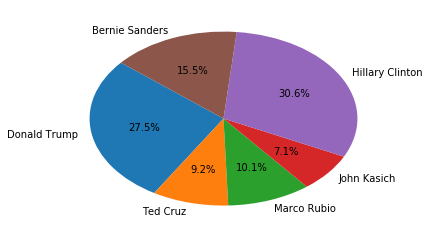

In [8]:
#This section is with help from a datacamp tutorial
#https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/named-entity-recognition?ex=3

ner_categories = defaultdict(int)

# Create the nested for loop
for tree in master_df['Tree']:
    for chunk in tree:
        if hasattr(chunk, 'label'):
            if chunk.label() in ['Hillary Clinton', 'Donald Trump', 'Bernie Sanders', 'Ted Cruz', 'Marco Rubio', 'John Kasich']:
                ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

**Let's build a data frame for each speaker with only their utterances in it.**

In [9]:
#There are 81 different speakers
speaker_counts = master_df['Speaker'].value_counts()
speaker_counts.size

89

In [10]:
#These are the top 20 speakers who had the most utterances. A larger count doesn't necissarilly 
#mean a speaker spoke for more time than another, just that they used more sentences.
speaker_counts[:20]

TRUMP        6013
CLINTON      4890
SANDERS      3545
RUBIO        2617
CRUZ         2117
KASICH       1977
BUSH         1461
OMALLEY      1073
CHRISTIE     1018
CARSON        974
COOPER        792
BLITZER       756
PAUL          752
TAPPER        677
WALLACE       652
FIORINA       614
KELLY         493
MUIR          488
DICKERSON     481
HOLT          416
Name: Speaker, dtype: int64

In [11]:
speakers = list(speaker_counts.index)
speakers

['TRUMP', 'CLINTON', 'SANDERS', 'RUBIO', 'CRUZ', 'KASICH', 'BUSH', 'OMALLEY', 'CHRISTIE', 'CARSON', 'COOPER', 'BLITZER', 'PAUL', 'TAPPER', 'WALLACE', 'FIORINA', 'KELLY', 'MUIR', 'DICKERSON', 'HOLT', 'RADDATZ', 'BAIER', 'CUOMO', 'BASH', 'HUCKABEE', 'BARTIROMO', 'CAVUTO', 'WALKER', 'HEWITT', 'QUESTION', 'TODD', 'WEBB', 'QUINTANILLA', 'CHAFEE', 'QUICK', 'RAMOS', 'HARWOOD', 'MADDOW', 'SALINAS', 'BAKER', 'WOODRUFF', 'IFILL', 'MITCHELL', 'LEMON', 'TUMULTY', 'GARRETT', 'LOUIS', 'CORDES', 'MCELVEEN', 'HAM', 'DINAN', 'STRASSEL', 'UNKNOWN', 'COONEY', 'UNIDENTIFIED', 'LOPEZ', 'EPPERSON', 'OBRADOVICH', 'SANTELLI', 'CRAMER', 'ANNOUNCER', 'LEVESQUE', 'GOODSON', 'BROWNLEE', 'FRANCHESCA', 'JENNA', 'FRANTA', 'BISHOP', 'SMITH', 'LASSEN', 'MODERATOR', 'PANELISTS', 'AUDIENCE', 'ARNOLD', 'PERRY', 'CRAWFORD', 'BRETT', 'PLUMMER', 'ALEXIS', 'DICK', 'WILKINS', 'ROSENGREN', 'SEAN', 'COLLISON', 'JOY', 'MALE', 'UNIDENTIFIABLE', 'DEBORAH', 'HANNITY']

In [13]:
speaker_dfs = []
for speaker in speakers:
    df = master_df.loc[master_df['Speaker']==speaker, :]
    speaker_dfs.append(df)

**First, let's focus on the candidates. The ultimate goal of this project is to focus on the referring expressions Hillary Clinton and Donald Trump use for each other, but analyzing how they refer to other candidates, and other candidates them can be helpful in comparison.**

In [14]:
trump = speaker_dfs[0]
clinton = speaker_dfs[1]
sanders = speaker_dfs[2]
rubio = speaker_dfs[3]
cruz = speaker_dfs[4]
kasich = speaker_dfs[5]
bush = speaker_dfs[6]
omalley = speaker_dfs[7]
christie = speaker_dfs[8]
carson = speaker_dfs[9]
paul = speaker_dfs[12]
fiorina = speaker_dfs[15]
huckabee = speaker_dfs[24]
walker = speaker_dfs[27]
webb = speaker_dfs[31]
chafee = speaker_dfs[33]

In [15]:
trump.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
170,1-14-16,primary_rep,TRUMP,"It's not fear and terror, it's reality.","[(It, PRP), ('s, VBZ), (not, RB), (fear, JJ), ...",[]
171,1-14-16,primary_rep,TRUMP,"You just have to look today at Indonesia, bomb...","[(You, PRP), (just, RB), (have, VBP), (to, TO)...",[]
172,1-14-16,primary_rep,TRUMP,"[applause]\n\nYou look at California, you look...","[([, NN), (applause, NN), (], NNP), (You, PRP)...",[]
173,1-14-16,primary_rep,TRUMP,"They're very, very badly wounded.","[(They, PRP), ('re, VBP), (very, RB), (,, ,), ...",[]
174,1-14-16,primary_rep,TRUMP,They will — some will follow.,"[(They, PRP), (will, MD), (—, VB), (some, DT),...",[]


In [16]:
clinton.head()

,Date,Debate Type,Speaker,Sents,Tree,Entities
1617,1-17-16,primary_dem,CLINTON,"Well, good evening.","[(Well, RB), (,, ,), (good, JJ), (evening, NN)...",[]
1618,1-17-16,primary_dem,CLINTON,And I want to thank the Congressional Black Ca...,"[(And, CC), (I, PRP), (want, VBP), (to, TO), (...",[]
1619,1-17-16,primary_dem,CLINTON,"You know, I remember well when my youth minist...","[(You, PRP), (know, VBP), (,, ,), (I, PRP), (r...",[]
1620,1-17-16,primary_dem,CLINTON,I was a teenager.,"[(I, PRP), (was, VBD), (a, DT), (teenager, NN)...",[]
1621,1-17-16,primary_dem,CLINTON,"And his moral clarity, the message that he con...","[(And, CC), (his, PRP$), (moral, JJ), (clarity...",[]


**First, we're going to get some stats.**

In [17]:
trump[['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree']].describe()

,Date,Debate Type,Speaker,Sents,Tree
count,6013,6013,6013,6013,6013
unique,14,2,1,5606,5541
top,9-26-16,primary_rep,TRUMP,[applause],"[([, NN), (applause, NN), (], NN)]"
freq,751,3979,6013,89,89


In [18]:
clinton[['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree']].describe()

,Date,Debate Type,Speaker,Sents,Tree
count,4890,4890,4890,4890,4890
unique,13,2,1,4686,4672
top,4-14-16,primary_dem,CLINTON,[applause],"[([, NN), (applause, NN), (], NN)]"
freq,495,3660,4890,118,118


**These descriptions show that out of all of the debates, Trump had his most utterances in the 9-26-16 debate, and Clinton had her most utterances in the 4-14-16 debate. The most frequent "utterance" by both of these candidates was the transcription for applause. Based on these transcriptions, Clinton was applauded 118 times while Trump was applauded 92 times. Out of Trump's 5997 utterances, 5586 of those were unique. Somehow, there are less unique trees than there are unique utterances. I'm not quite sure how that is. Out of Clinton's 4892 utterances, 4687 of those were unique, and there are only 4673 unique trees.**

**Let's see all of the people Trump talks about.**

In [19]:
#This function returns a set of all of the relevant entities a given speaker refers to.
def get_entities(entities):
    all_ents = []
    for entity_list in entities:
        for ent in entity_list:
            all_ents.append(ent)
    return set(all_ents)

In [20]:
trump_referred_to = get_entities(trump['Entities'])

In [21]:
trump_referred_to

{'Marco Rubio', "Rosie O'Donnell", 'Don Lemon', 'John Podesta', 'Rick Santorum', 'Hillary Clinton', 'Rand Paul', 'Ivanka Trump', 'Chris Christie', 'Wolf Blitzer', 'Abraham Lincoln', 'Eric Trump', 'Dana Bash', 'Carl Quintanilla', 'George Bush', 'Jeb Bush', 'Humayun Khan', 'Lester Holt', 'Edward Snowden', 'Dwight Eisenhower', 'Mike Huckabee', 'Jake Tapper', 'Mitt Romney', 'Vladimir Putin', 'John Kerry', 'Saddam Hussein', 'Donald Trump', 'Bill Clinton', 'Antonin Scalia', 'Joe Arpaio', 'Angela Merkel', 'Benjamin Netanyahu', 'Bret Baier', 'Lindsey Graham', 'TITLE', 'Megyn Kelly', 'Michelle Obama', 'Hugh Hewitt', 'Elizabeth Warren', 'Michael Bloomberg', 'Ronald Reagan', 'Barack Obama', 'Bernie Sanders', 'John Kennedy', 'Deborah Wasserman Schultz', 'Nikki Haley', 'NICKNAME', 'Carly Fiorina', 'Mitch McConnell', 'Neil Cavuto', 'Jeff Sessions', 'John Kasich', "Tip O'Neill", 'Maria Celeste Arraras', 'Ted Cruz', 'Ben Carson', 'Muammar Gaddafi', 'Rosa Parks', 'Sean Hannity', 'Anderson Cooper', 'Dav

In [22]:
clinton_referred_to = get_entities(clinton['Entities'])

In [23]:
clinton_referred_to

{'Joe Biden', 'Osama bin Laden', 'Don Lemon', 'Jorge Ramos', 'Hillary Clinton', 'Al Gore', 'Chris Cuomo', 'Michael Brown', 'Chris Christie', 'Chuck Todd', 'Jim Webb', 'Abraham Lincoln', 'Wolf Blitzer', 'Dana Bash', 'Yasser Arafat', 'Jeb Bush', 'Lester Holt', 'Humayun Khan', 'George W. Bush', 'Alicia Machado', 'Vladimir Putin', "Martin O'Malley", 'John Kerry', 'Bill Clinton', 'Donald Trump', 'Martha Raddatz', 'Saddam Hussein', 'Eric Garner', 'Rachel Maddow', 'Benjamin Netanyahu', 'Nelson Mandela', 'Lindsey Graham', 'TITLE', 'Hosni Mubarak', 'Michelle Obama', 'James Carter', 'George Washington', 'Elizabeth Warren', 'Scott Walker', 'Ronald Reagan', 'Barack Obama', 'Bernie Sanders', 'Trayvon Martin', 'David Muir', 'Sandra Bland', 'Harry Truman', 'Nikki Haley', 'Ashraf Ghani', 'John McCain', 'John Kasich', 'Muammar Gaddafi', 'Anderson Cooper', 'David Duke', 'Lincoln Chafee', 'Tamir Rice', 'Andrea Mitchell', 'Bashar al-Assad'}

In [24]:
#This function returns a list of REs a speaker used to describe a given entity.
def get_RE_for_label(trees, label):
    name = ''
    REs = []
    RE_trees = []
    ents=set(link_dict.values())
    for tree in trees:
        for chunk in tree:
            if hasattr(chunk, 'label'):
                if label == 'all':
                    if chunk.label() in ents:
                        for leaf in chunk.leaves():
                            name+=' '+str(leaf[0])
                        name = name.strip()
                        REs.append(name)
                        name = ''
                    else:
                        name = ''
                else:
                    if chunk.label()==label:
                        for leaf in chunk.leaves():
                            name+=' '+str(leaf[0])
                        name = name.strip()
                        REs.append(name)
                        name = ''
                    else:
                        name = ''
    return REs

In [25]:
trump_REclinton = get_RE_for_label(trump['Tree'], 'Hillary Clinton')
trump_REclinton

['Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'President Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Clinton', 'Hillary', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary Clinton', 'Hillary', 'Hillary Clinton', 'Hillary Clinton', 'Hil

In [26]:
len(trump_REclinton)

99

In [27]:
clinton_REtrump = get_RE_for_label(clinton['Tree'], 'Donald Trump')
clinton_REtrump

['Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Trump', 'Donald', 'Donald', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald Trump', 'Mr. Trump', 'Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Donald Trump', 'Trump', 'Donald Trump', 'Donald', 'Donald Trump', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald', 'Donald

In [28]:
len(clinton_REtrump)

108

**Let's get the a data frame of all of the times Trump referred to Clinton, and a data frame for all of the times Clinton referred to Trump. That way we have information about the type of debate that person was referred to in, and more context as to *how* they were referred to by looking at the whole sentence.**

In [29]:
#This function returns the a dataframe that only includes rows where the given person is mentioned.
def get_entity_trees(df, label):
    df2 = pd.DataFrame(columns=['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree'])
    row=0
    for ent_list in df['Entities']:
        if label in ent_list:
            df2.loc[row]=(df.iloc[row][:])
        row+=1
    return df2

In [30]:
clinton_trump_tree = get_entity_trees(clinton, 'Donald Trump')

In [31]:
len(clinton_trump_tree)

105

In [32]:
clinton_trump_tree.head()

,Date,Debate Type,Speaker,Sents,Tree
955,10-19-16,general,CLINTON,"And, you know, look, I understand that Donald'...","[(And, CC), (,, ,), (you, PRP), (know, VBP), (..."
964,10-19-16,general,CLINTON,Donald has said he's in favor of defunding Pla...,"[[(Donald, NNP)], (has, VBZ), (said, VBD), (he..."
991,10-19-16,general,CLINTON,I don't want to see the deportation force that...,"[(I, PRP), (do, VBP), (n't, RB), (want, VB), (..."
1005,10-19-16,general,CLINTON,When it comes to the wall that Donald talks ab...,"[(When, WRB), (it, PRP), (comes, VBZ), (to, TO..."
1013,10-19-16,general,CLINTON,"But it is clear, when you look at what Donald ...","[(But, CC), (it, PRP), (is, VBZ), (clear, JJ),..."


**Notice that our list of all of the ways Clinton referred to Trump is 3 elements bigger than our data frame is. That must be because Clinton referred to him multiple times in one utterance.**

In [33]:
trump_clinton_tree = get_entity_trees(trump, 'Hillary Clinton')

In [34]:
len(trump_clinton_tree)

97

In [35]:
trump_clinton_tree.head()

,Date,Debate Type,Speaker,Sents,Tree
331,10-19-16,general,TRUMP,"But Hillary was extremely upset, extremely angry.","[(But, CC), [(Hillary, NNP)], (was, VBD), (ext..."
337,10-19-16,general,TRUMP,And I am—I don't know if Hillary was saying it...,"[(And, CC), (I, PRP), (am—I, VBP), (do, VBP), ..."
349,10-19-16,general,TRUMP,"If you go with what Hillary is saying, in the ...","[(If, IN), (you, PRP), (go, VBP), (with, IN), ..."
350,10-19-16,general,TRUMP,"Now, you can say that that's OK and Hillary ca...","[(Now, RB), (,, ,), (you, PRP), (can, MD), (sa..."
362,10-19-16,general,TRUMP,Hillary wants to give amnesty.,"[[(Hillary, JJ)], (wants, VBZ), (to, TO), (giv..."


**Now that we have some more context, let's look at how many times each different RE for Clinton and Trump was used by the other one.**

In [36]:
trump_clinton_freq = {re: trump_REclinton.count(re) for re in trump_REclinton}
trump_clinton_freq

{'Hillary': 42, 'Hillary Clinton': 33, 'President Clinton': 1, 'Clinton': 2, 'Secretary Clinton': 21}

**It looks like out of the 100 times Trump referred to Clinton, he used her first name 42 times, her full name 34 times, a professional title 21 times, only her lasy name twice, and "President Clinton" once. President Clinton is most likely a mistaken tag, and referring to Bill Clinton.**

In [38]:
clinton_trump_freq = {re: clinton_REtrump.count(re) for re in clinton_REtrump}
clinton_trump_freq

{'Donald': 80, 'Donald Trump': 23, 'Trump': 4, 'Mr. Trump': 1}

**Out of the 108 times Clinton referred to Trump, she used his first name 80 times, his full name 23 times, his last name 4 times, and a professional title once.**

**Let's categorize the ways a person can be referred to into different types. I will define the types as follows:**

**PROFESSIONAL- Senator, Secretary, Businessman, Dr., Governor, etc.**

**FIRST NAME- Hillary, Donald, etc.**

**FULL NAME- Hillary Clinton, Donald Trump, etc.**

**LAST NAME- Clinton, Trump, etc.**

**GENDERED- Mrs., Ms., Miss, Mr. (Only if they posess an alternate professional title)**

In [39]:
master_REclinton = get_RE_for_label(master_df['Tree'], 'Hillary Clinton')
set(master_REclinton)

{'Hillary Rodham Clinton', 'Secretary Hillary Clinton', 'Hill', 'Hilary Clinton', 'Madam Secretary', 'Hillary', 'Hillary Clinton', 'Secretary Clinton', 'Senator Clinton', 'Mrs. Clinton', 'President Clinton', 'Clinton'}

In [40]:
master_REclinton_freq = {re: master_REclinton.count(re) for re in master_REclinton}
master_REclinton_freq

{'Secretary Clinton': 590, 'Hillary Clinton': 310, 'Hillary': 64, 'Hillary Rodham Clinton': 3, 'Clinton': 50, 'Secretary Hillary Clinton': 4, 'President Clinton': 13, 'Mrs. Clinton': 12, 'Madam Secretary': 6, 'Hill': 1, 'Senator Clinton': 6, 'Hilary Clinton': 1}

In [41]:
len(master_REclinton_freq)

12

**The length of this dictionary is 12, but since President Clinton is most likely tagging error that's difficult to fix (actually referring to President Bill Clinton). Let's take a look at these to be sure.**

In [44]:
master_presclinton = get_trees_for(master_df, 'Hillary Clinton', 'President Clinton')
master_presclinton

,Date,Debate Type,Speaker,Sents,Tree
2538,1-17-16,primary_dem,HOLT,You have said that President Clinton would adv...,"[(You, PRP), (have, VBP), (said, VBD), (that, ..."
2755,1-25-16,primary_dem,CUOMO,"And, if you do a checklist of how you pay for ...","[(And, CC), (,, ,), (if, IN), (you, PRP), (do,..."
5922,10-13-15,primary_dem,SANDERS,"Well, obviously, I voted, when President Clin...","[(Well, RB), (,, ,), (obviously, RB), (,, ,), ..."
6065,10-13-15,primary_dem,SANDERS,I supported President Clinton's effort to deal...,"[(I, PRP), (supported, VBD), [(President, NNP)..."
8145,10-19-16,general,WALLACE,"Secondly, if you impose a no-fly zone and a Ru...","[(Secondly, RB), (,, ,), (if, IN), (you, PRP),..."
10222,10-9-16,general,TRUMP,"But what President Clinton did, he was impeach...","[(But, CC), (what, WP), [(President, NNP), (Cl..."
11454,11-10-15,primary_rep,BARTIROMO,"Governor Kasich, you have spoken much about yo...","[[(Governor, NNP), (Kasich, NNP)], (,, ,), (yo..."
11575,11-10-15,primary_rep,BAKER,"Under President Clinton, the economy added abo...","[(Under, IN), [(President, NNP), (Clinton, NNP..."
30197,3-9-16,primary_dem,CLINTON,"You know, in the debates we've had — maybe thi...","[(You, PRP), (know, VBP), (,, ,), (in, IN), (t..."
30214,3-9-16,primary_dem,SANDERS,"[laughter]\n\nNow, when we talk about the poli...","[([, JJ), (laughter, NN), (], NN), (Now, RB), ..."


**As expected, these all appear to be tagging mistakes, so we will ignore these.**

**That being said, and because Hilary Clinton is just a mispelling, there are only 10 ways of referring to Hillary Clinton. That being said, I can categorize these RE's into the categories described above very easily by hand.**

**Madam Secretary could be considered professional because it has information about her previous job, but the use of "Madam" instead of just saying "Secretary" when that would suffice just as well makes this RE gendered. The use of Clinton's full name, including her maiden name (Hillary Rodham Clinton), could be an interesting case. I'm going to look at these three instances closer.**

In [45]:
master_rodham = get_trees_for(master_df, 'Hillary Clinton', 'Hillary Rodham Clinton')
master_rodham

,Date,Debate Type,Speaker,Sents,Tree
435,1-14-16,primary_rep,CHRISTIE,"He's a good guy, a smart guy, and he would be ...","[(He, PRP), ('s, VBZ), (a, DT), (good, JJ), (g..."
1277,1-14-16,primary_rep,CHRISTIE,And I'm the only one up on this stage who back...,"[(And, CC), (I, PRP), ('m, VBP), (the, DT), (o..."
4340,1-28-16,primary_rep,CHRISTIE,Hillary Rodham Clinton did that to our country.,"[[(Hillary, NNP), (Rodham, NNP), (Clinton, NNP..."


**Interesting. Chris Christie is the only one to use Hillary Clinton's maiden name. We'll come back to what this could mean later.**

In [95]:
clinton_re_maps = {'Secretary Clinton': 'PROFESSIONAL', 'Hillary Clinton': "FULL NAME", 'Hillary': "FIRST NAME", 'Hillary Rodham Clinton': "FULL NAME", 'Clinton': "LAST NAME", 'Secretary Hillary Clinton': "PROFESSIONAL", 'Mrs. Clinton': "GENDERED", 'Madam Secretary': "GENDERED", 'Hill': "FIRST NAME", 'Senator Clinton': "PROFESSIONAL", 'Hilary Clinton': "FULL NAME"}
clinton_re_maps

{'Secretary Clinton': 'PROFESSIONAL', 'Hillary Clinton': 'FULL NAME', 'Hillary': 'FIRST NAME', 'Hillary Rodham Clinton': 'FULL NAME', 'Clinton': 'LAST NAME', 'Secretary Hillary Clinton': 'PROFESSIONAL', 'Mrs. Clinton': 'GENDERED', 'Madam Secretary': 'GENDERED', 'Hill': 'FIRST NAME', 'Senator Clinton': 'PROFESSIONAL', 'Hilary Clinton': 'FULL NAME'}

In [96]:
def get_re_type_freq(re_map, freq_dict):
    re_freq_dict = {}
    for key in re_map:
        if re_map[key] in re_freq_dict.keys():
            re_freq_dict[re_map[key]] += freq_dict[key]
        else:
            re_freq_dict[re_map[key]] = freq_dict[key]
    return re_freq_dict

In [97]:
clinton_freq = get_re_type_freq(clinton_re_maps, master_REclinton_freq)
clinton_freq

{'PROFESSIONAL': 600, 'FULL NAME': 314, 'FIRST NAME': 65, 'LAST NAME': 50, 'GENDERED': 18}

**Let's do the same for Donald Trump and map his REs.**

In [98]:
master_REtrump = get_RE_for_label(master_df['Tree'], 'Donald Trump')
set(master_REtrump)

{'Mr. Trmup', 'Mr. Trump', 'Mr. Donald Trump', 'Donald', 'Businessman Donald Trump', 'Donald J. Trump', 'Donald Trump', 'Trump', 'Senator Trump', 'President Trump'}

In [48]:
master_REtrump_freq = {re: master_REtrump.count(re) for re in master_REtrump}
master_REtrump_freq

{'Businessman Donald Trump': 2, 'Mr. Trump': 458, 'Donald Trump': 176, 'Donald': 252, 'Donald J. Trump': 6, 'Trump': 47, 'President Trump': 4, 'Mr. Trmup': 1, 'Mr. Donald Trump': 3, 'Senator Trump': 1}

**That Senator Trump is weird because Donald Trump was never a senator. Let's see what's up with that.**

In [49]:
master_sentrump = get_trees_for(master_df, 'Donald Trump', 'Senator Trump')
master_sentrump

,Date,Debate Type,Speaker,Sents,Tree
25524,3-10-16,primary_rep,HEWITT,Senator Trump...[crosstalk],"[[(Senator, NNP), (Trump, NNP)], (..., :), ([,..."


In [50]:
master_df.loc[25520:25530][:]

,Date,Debate Type,Speaker,Sents,Tree,Entities
25520,3-10-16,primary_rep,TRUMP,But I would like to at least have the other si...,"[(But, CC), (I, PRP), (would, MD), (like, VB),...",[]
25521,3-10-16,primary_rep,TRUMP,Maybe we can get a deal.,"[(Maybe, RB), (we, PRP), (can, MD), (get, VB),...",[]
25522,3-10-16,primary_rep,TRUMP,I think it's probably the toughest negotiation...,"[(I, PRP), (think, VBP), (it, PRP), ('s, VBZ),...",[]
25523,3-10-16,primary_rep,TRUMP,But maybe we can get a deal done.,"[(But, CC), (maybe, RB), (we, PRP), (can, MD),...",[]
25524,3-10-16,primary_rep,HEWITT,Senator Trump...[crosstalk],"[[(Senator, NNP), (Trump, NNP)], (..., :), ([,...",[Donald Trump]
25525,3-10-16,primary_rep,TRUMP,"And, by the way, just so you understand, as f...","[(And, CC), (,, ,), (by, IN), (the, DT), (way,...",[]
25526,3-10-16,primary_rep,TRUMP,I think it's maybe the world deal I've ever seen.,"[(I, PRP), (think, VBP), (it, PRP), ('s, VBZ),...",[]
25527,3-10-16,primary_rep,TRUMP,I think it's the worst deal I've ever seen neg...,"[(I, PRP), (think, VBP), (it, PRP), ('s, VBZ),...",[]
25528,3-10-16,primary_rep,TRUMP,I will be so tough on them and ultimately that...,"[(I, PRP), (will, MD), (be, VB), (so, RB), (to...",[]
25529,3-10-16,primary_rep,TRUMP,That deal will be broken.,"[(That, DT), (deal, NN), (will, MD), (be, VB),...",[]


**Looks like it wasn't a tagging mistake. It was a slip of the tongue.**

In [51]:
len(master_REtrump_freq)

10

**The length of this dictionary is 10, but since one of these keys 'Mr. Trmup', is just a typo, we will say Donald Trump is only referred to in 9 different ways throughout this entire corpus.**

**The line between professional title and gendered title gets a little fuzzy with Donald Trump because of his lack of political experience. His professional title is simply Mr., which is inherently gendered. I have decided to define Mr. as professional in this case because of a lack of any other term. We have two factors at play: gender and experience. Hillary Clinton and Carly Fiorina are the only two female candidates. Clinton has several titles due to her experience in politics, and Fiorina does not. We can compare how the two are referred to by looking at being called a professional title (Senator or Secretary for Clinton; Mrs. for Fiorina) or by their first name only or first and last name. Donald Trump is the only male candidate without a professional title other than Mr. We can make the same the same comparison with him and the other male candidates. Does the frequency of being called by a first name or without a title have to do with gender? Or does it have to do with experience?**

In [52]:
trump_re_maps = {'Businessman Donald Trump': 'PROFESSIONAL', 'Mr. Trump': 'PROFESSIONAL', 'Donald Trump': 'FULL NAME', 'Donald': 'FIRST NAME', 'Donald J. Trump': 'FULL NAME', 'Trump': 'LAST NAME', 'President Trump': 'PROFESSIONAL', 'Mr. Trmup': 'PROFESSIONAL', 'Mr. Donald Trump': 'PROFESSIONAL', 'Senator Trump': 'PROFESSIONAL'}
trump_re_maps

{'Businessman Donald Trump': 'PROFESSIONAL', 'Mr. Trump': 'PROFESSIONAL', 'Donald Trump': 'FULL NAME', 'Donald': 'FIRST NAME', 'Donald J. Trump': 'FULL NAME', 'Trump': 'LAST NAME', 'President Trump': 'PROFESSIONAL', 'Mr. Trmup': 'PROFESSIONAL', 'Mr. Donald Trump': 'PROFESSIONAL', 'Senator Trump': 'PROFESSIONAL'}

In [78]:
trump_freq = get_re_type_freq(trump_re_maps, master_REtrump_freq)
trump_freq

{'PROFESSIONAL': 469, 'FULL NAME': 182, 'FIRST NAME': 252, 'LAST NAME': 47}

**Let's do the same for Carly Fiorina, and then for all of the candidates who made it to the last primary debate.**

#### Carly Fiorina

In [53]:
master_REfiorina = get_RE_for_label(master_df['Tree'], 'Carly Fiorina')
set(master_REfiorina)

{'Carly Fiorina', 'Businesswoman Carly Fiorina', 'Mrs. Fiorina', 'President Fiorina', 'Carly', 'Fiorina'}

In [54]:
master_REfiorina_freq = {re: master_REfiorina.count(re) for re in master_REfiorina}
master_REfiorina_freq

{'Carly Fiorina': 17, 'Mrs. Fiorina': 17, 'Fiorina': 38, 'Businesswoman Carly Fiorina': 1, 'Carly': 10, 'President Fiorina': 2}

In [55]:
fiorina_re_maps = {'Carly Fiorina': "FULL NAME", 'Mrs. Fiorina': "PROFESSIONAL", 'Fiorina': "LAST NAME", 'Businesswoman Carly Fiorina': "PROFESSIONAL", 'Carly': "FIRST NAME", 'President Fiorina': "PROFESSIONAL"}
fiorina_re_maps

{'Carly Fiorina': 'FULL NAME', 'Mrs. Fiorina': 'PROFESSIONAL', 'Fiorina': 'LAST NAME', 'Businesswoman Carly Fiorina': 'PROFESSIONAL', 'Carly': 'FIRST NAME', 'President Fiorina': 'PROFESSIONAL'}

In [79]:
fiorina_freq = get_re_type_freq(fiorina_re_maps, master_REfiorina_freq)
fiorina_freq

{'FULL NAME': 17, 'PROFESSIONAL': 20, 'LAST NAME': 38, 'FIRST NAME': 10}

#### Bernie Sanders

In [56]:
master_REsanders = get_RE_for_label(master_df['Tree'], 'Bernie Sanders')
set(master_REsanders)

{'Senator Bernie Sanders', 'Sanders', 'Governor Sanders', 'President Sanders', 'Bernie', 'Secretary Sanders', 'Senator Sander', 'Bernie Sanders', 'Senator Sanders', 'Vermont Bernie Sanders'}

In [57]:
master_REsanders_freq = {re: master_REsanders.count(re) for re in master_REsanders}
master_REsanders_freq

{'Senator Bernie Sanders': 8, 'Bernie': 13, 'Bernie Sanders': 61, 'Senator Sanders': 418, 'Governor Sanders': 1, 'Sanders': 21, 'President Sanders': 8, 'Secretary Sanders': 3, 'Senator Sander': 1, 'Vermont Bernie Sanders': 1}

In [81]:
#There are some REs in here that are typos, and some where people just used incorrect titles (Secretary Sanders)
#We are still going to map those to professional
sanders_re_maps = {'Senator Bernie Sanders': "PROFESSIONAL", 'Bernie': "FIRST NAME", 'Bernie Sanders': "FULL NAME", 'Senator Sanders': "PROFESSIONAL", 'Governor Sanders': "PROFESSIONAL", 'Sanders': "LAST NAME", 'President Sanders': "PROFESSIONAL", 'Secretary Sanders': "PROFESSIONAL", 'Senator Sander': "PROFESSIONAL", 'Vermont Bernie Sanders': "PROFESSIONAL"}
sanders_re_maps

{'Senator Bernie Sanders': 'PROFESSIONAL', 'Bernie': 'FIRST NAME', 'Bernie Sanders': 'FULL NAME', 'Senator Sanders': 'PROFESSIONAL', 'Governor Sanders': 'PROFESSIONAL', 'Sanders': 'LAST NAME', 'President Sanders': 'PROFESSIONAL', 'Secretary Sanders': 'PROFESSIONAL', 'Senator Sander': 'PROFESSIONAL', 'Vermont Bernie Sanders': 'PROFESSIONAL'}

In [82]:
sanders_freq = get_re_type_freq(sanders_re_maps, master_REsanders_freq)
sanders_freq

{'PROFESSIONAL': 440, 'FIRST NAME': 13, 'FULL NAME': 61, 'LAST NAME': 21}

#### Marco Rubio

In [59]:
master_RErubio = get_RE_for_label(master_df['Tree'], 'Marco Rubio')
set(master_RErubio)

{'Marco Rubio', 'Senator Marco Rubio', 'President Rubio', 'Senator Rubio', 'Rubio', 'Mr. Rubio', 'Florida Senator Marco Rubio', 'Marco', 'Florida Senator'}

In [60]:
master_RErubio_freq = {re: master_RErubio.count(re) for re in master_RErubio}
master_RErubio_freq

{'Marco Rubio': 17, 'Senator Rubio': 224, 'Marco': 84, 'Senator Marco Rubio': 14, 'Florida Senator Marco Rubio': 2, 'Rubio': 5, 'Mr. Rubio': 2, 'Florida Senator': 1, 'President Rubio': 1}

In [61]:
rubio_re_maps = {'Marco Rubio': "FULL NAME", 'Senator Rubio': "PROFESSIONAL", 'Marco': "FIRST NAME", 'Senator Marco Rubio': "PROFESSIONAL", 'Florida Senator Marco Rubio': "PROFESSIONAL", 'Rubio': "LAST NAME", 'Mr. Rubio': "GENDERED", 'Florida Senator': "PROFESSIONAL", 'President Rubio': "PROFESSIONAL"}
rubio_re_maps

{'Marco Rubio': 'FULL NAME', 'Senator Rubio': 'PROFESSIONAL', 'Marco': 'FIRST NAME', 'Senator Marco Rubio': 'PROFESSIONAL', 'Florida Senator Marco Rubio': 'PROFESSIONAL', 'Rubio': 'LAST NAME', 'Mr. Rubio': 'GENDERED', 'Florida Senator': 'PROFESSIONAL', 'President Rubio': 'PROFESSIONAL'}

In [83]:
rubio_freq = get_re_type_freq(rubio_re_maps, master_RErubio_freq)
rubio_freq

{'FULL NAME': 17, 'PROFESSIONAL': 242, 'FIRST NAME': 84, 'LAST NAME': 5, 'GENDERED': 2}

#### Ted Cruz

In [62]:
master_REcruz = get_RE_for_label(master_df['Tree'], 'Ted Cruz')
set(master_REcruz)

{'Texas Senator', 'Ted Cruz', 'Senator Ted Cruz', 'Senator Cruz', 'Texas Senator Ted Cruz', 'Mr. Cruz', 'Ted', 'President Cruz', 'Lyin', 'Cruz'}

In [63]:
master_REcruz_freq = {re: master_REcruz.count(re) for re in master_REcruz}
master_REcruz_freq

{'Ted Cruz': 34, 'Senator Cruz': 209, 'Ted': 58, 'Cruz': 9, 'Texas Senator Ted Cruz': 2, 'Mr. Cruz': 2, 'Texas Senator': 1, 'Lyin': 2, 'President Cruz': 1, 'Senator Ted Cruz': 1}

In [77]:
cruz_re_maps = {'Ted Cruz': 'FULL NAME', 'Senator Cruz': "PROFESSIONAL", 'Ted': "FIRST NAME", 'Cruz': "LAST NAME", 'Texas Senator Ted Cruz': "PROFESSIONAL", 'Mr. Cruz': "GENDERED", 'Texas Senator': "PROFESSIONAL", 'Lyin': "NICKNAME", 'President Cruz': "PROFESSIONAL", 'Senator Ted Cruz': "PROFESSIONAL"}
cruz_re_maps

{'Ted Cruz': 'FULL NAME', 'Senator Cruz': 'PROFESSIONAL', 'Ted': 'FIRST NAME', 'Cruz': 'LAST NAME', 'Texas Senator Ted Cruz': 'PROFESSIONAL', 'Mr. Cruz': 'GENDERED', 'Texas Senator': 'PROFESSIONAL', 'Lyin': 'NICKNAME', 'President Cruz': 'PROFESSIONAL', 'Senator Ted Cruz': 'PROFESSIONAL'}

In [84]:
cruz_freq = get_re_type_freq(cruz_re_maps, master_REcruz_freq)
cruz_freq

{'FULL NAME': 34, 'PROFESSIONAL': 214, 'FIRST NAME': 58, 'LAST NAME': 9, 'GENDERED': 2, 'NICKNAME': 2}

**We are going to exclude John Kasich from this analysis because there were issues discerning whether "John" referred to John Kasich or one of the many other Johns, including moderator John Harwood.**

In [138]:
distribution = pd.DataFrame([clinton_freq, trump_freq, sanders_freq, fiorina_freq, cruz_freq, rubio_freq], index = ['CLINTON', 'TRUMP', 'SANDERS', 'FIORINA', 'CRUZ', 'RUBIO'])
distribution.fillna(0, inplace=True)
distribution.head(6)

,FIRST NAME,FULL NAME,GENDERED,LAST NAME,NICKNAME,PROFESSIONAL
CLINTON,65,314,18.0,50,0.0,600
TRUMP,252,182,0.0,47,0.0,469
SANDERS,13,61,0.0,21,0.0,440
FIORINA,10,17,0.0,38,0.0,20
CRUZ,58,34,2.0,9,2.0,214
RUBIO,84,17,2.0,5,0.0,242


In [139]:
import numpy as np
distribution['TOTAL']=distribution.sum(axis=1)
distribution.head(6)

,FIRST NAME,FULL NAME,GENDERED,LAST NAME,NICKNAME,PROFESSIONAL,TOTAL
CLINTON,65,314,18.0,50,0.0,600,1047.0
TRUMP,252,182,0.0,47,0.0,469,950.0
SANDERS,13,61,0.0,21,0.0,440,535.0
FIORINA,10,17,0.0,38,0.0,20,85.0
CRUZ,58,34,2.0,9,2.0,214,319.0
RUBIO,84,17,2.0,5,0.0,242,350.0


In [140]:
distribution['FIRST NAME'] = distribution/distribution['TOTAL']*100
distribution['FULL NAME'] = distribution['FULL NAME']/distribution['TOTAL']*100
distribution['GENDERED'] = distribution['GENDERED']/distribution['TOTAL']*100
distribution['LAST NAME'] = distribution['LAST NAME']/distribution['TOTAL']*100
distribution['NICKNAME'] = distribution['NICKNAME']/distribution['TOTAL']*100
distribution['PROFESSIONAL'] = distribution['PROFESSIONAL']/distribution['TOTAL']*100
del distribution['TOTAL']
distribution.head(6)

,FIRST NAME,FULL NAME,GENDERED,LAST NAME,NICKNAME,PROFESSIONAL
CLINTON,NaN,29.990449,1.719198,4.775549,0.000000,57.306590
TRUMP,NaN,19.157895,0.000000,4.947368,0.000000,49.368421
SANDERS,NaN,11.401869,0.000000,3.925234,0.000000,82.242991
FIORINA,NaN,20.000000,0.000000,44.705882,0.000000,23.529412
CRUZ,NaN,10.658307,0.626959,2.821317,0.626959,67.084639
RUBIO,NaN,4.857143,0.571429,1.428571,0.000000,69.142857


In [159]:
plt.style.use('fivethirtyeight')

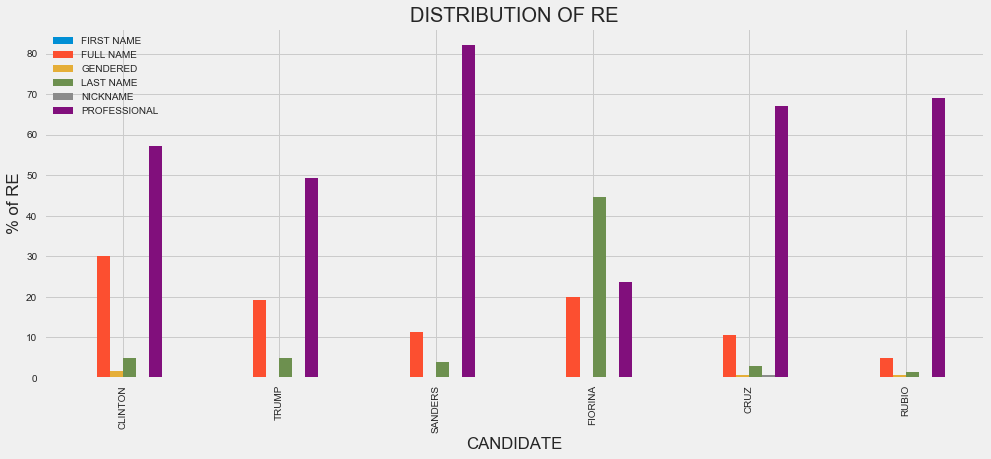

In [160]:
distribution.plot(kind='bar', figsize=(15,6))
plt.xlabel('CANDIDATE')
plt.ylabel('% of RE')
plt.title('DISTRIBUTION OF RE')
plt.show()
#Why are there two?

### Drawing a Conclusion
**There is only one more RE for Clinton than there are for Trump. I expected there to be more variation in the ways speakers refer to Clinton because she has had many different titles over the course of her career (Senator, Secretary, First Lady), she has a maiden name, and there are two common titles to refer to married women (Ms. and Mrs.) as opposed to one title for men (Mr.). **

**What does it mean to call someone by their professional title? Is this distribution in the way these candidates refer to other people different? Why would that be? What does that mean? In which debates were which forms of address used more frequently? In the entire dataframe, how is Clinton referred to by all people. How about Trump? How about Fiorina, the only other female candidate? How about male senators, governers, etc. This is interesting because like Trump, Fiorina has no political experience, so her title is simply Mrs. while his is Mr.**

In [43]:
#This function takes a data frame, and entity label, and a specific RE and returns all trees with that specific RE in it

def get_trees_for(df, label, RE):
    name = ''
    REs = []
    RE_trees = []
    df2 = pd.DataFrame(columns=['Date', 'Debate Type', 'Speaker', 'Sents', 'Tree'])
    row=0
    for tree in df['Tree']:
        for chunk in tree:
            if hasattr(chunk, 'label'):
                if chunk.label()==label:
                    for leaf in chunk.leaves():
                        name+=' '+str(leaf[0])
                    name = name.strip()
                    if name == RE:
                        df2.loc[row]=(df.iloc[row][:])
                    name = ''
                else:
                    name = ''
        row +=1
    return df2


In [ ]:
trump_re = get_RE_for_label(trump['Tree'], 'all')
trump_re_freq = {re: trump_re.count(re) for re in trump_re}
trump_re_freq

**Interesting. It looks like Trump refers to himself as Mr. Trump 6 times. Let's see those instances in context.**

In [ ]:
trump_mrtrump_trees = get_trees_for(trump, 'Donald Trump', 'Mr. Trump')

In [ ]:
trump_mrtrump_trees

In [ ]:
trump_mrtrump_trees.loc[2152]['Sents']

In [ ]:
trump_mrtrump_trees.loc[2153]['Sents']

In [ ]:
trump_mrtrump_trees.loc[2153]['Tree']

In [ ]:
#Let's also look at that one instance where Trump says "President Clinton" to see what that is about.
trump_presidentclinton_trees = get_trees_for(trump, 'Hillary Clinton', 'President Clinton')
trump_presidentclinton_trees

In [ ]:
clinton_re = get_RE_for_label(clinton['Tree'], 'all')
clinton_re_freq = {re: clinton_re.count(re) for re in clinton_re}
clinton_re_freq